# Implementasi Convex Hull untuk Visualisasi Tes Linear Separability Dataset dengan Algoritma Divide and Conquer

Nama: Alifia Rahmah

NIM: 13520122

## Preparation

In [40]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Function Implementation

### Math

In [41]:
def isOnTop(p1, p2, p3):
  # memeriksa sebuah titik berada di atas garis yang dibentuk 2 titik
  if (p1[0] - p2[0] == 0):
    if (p3[0] < p1[0]):
      return True
    else:
      return False
  m = (p1[1] - p2[1]) / (p1[0] - p2[0])
  yline = p1[1] + m * (p3[0] - p1[0])
  if p3[1] > yline:
    return True
  elif p3[1] < yline:
    return False
  else:
    return False

def isOnBot(p1, p2, p3):
  # memeriksa sebuah titik berada di bawah garis yang dibentuk 2 titik
  if (p1[0] - p2[0] == 0):
    if (p3[0] < p1[0]):
      return False
    else:
      return True
  m = (p1[1] - p2[1]) / (p1[0] - p2[0])
  yline = p1[1] + m * (p3[0] - p1[0])
  if p3[1] > yline:
    return False
  elif p3[1] < yline:
    return True
  else:
    return False

def distance(p1, p2):
  # hitung jarak
  return np.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

def furthestPoint(bucket, p1, p2):
  # cari titik terjauh di kumpulan titik
  max_dist = 0
  max_point = None
  for point in bucket:
    dist = distance(p1, point) + distance(p2, point)
    if dist > max_dist:
      max_dist = dist
      max_point = point
  return max_point

### Recursive

In [42]:
def divideTop(bucket):
  # basis
  if (len(bucket) <= 2):
    return bucket

  # ambil ujung2 titik
  minPoint = bucket[0]
  maxPoint = bucket[-1]

  # hitung titik terjauh
  p = furthestPoint(bucket, minPoint, maxPoint)

  # list kiri & kanan
  left = [minPoint]
  right = [p]

  for point in bucket:
    if isOnTop(minPoint, p, point):
      left.append(point)
    elif isOnTop(p, maxPoint, point):
      right.append(point)

  left.append(p)
  right.append(maxPoint)

  # rekurens
  return divideTop(left) + divideTop(right)


def divideBot(bucket):
  # basis
  if (len(bucket) <= 2):
    return bucket
  
  # ambil ujung2 titik
  minPoint = bucket[0]
  maxPoint = bucket[-1]

  # hitung titik terjauh
  p = furthestPoint(bucket, minPoint, maxPoint)

  # list kiri & kanan
  left = [minPoint]
  right = [p]

  for point in bucket:
    if isOnBot(minPoint, p, point):
      left.append(point)
    elif isOnBot(p, maxPoint, point):
      right.append(point)
      
  left.append(p)
  right.append(maxPoint)

  # rekurens
  return divideBot(left) + divideBot(right)


def myConvexHull(bucket):
  # urut semua titik
  bucket = sorted(bucket, key=lambda x: (x[0], x[1])) 

  # ambil ujung untuk jadi garis
  minPoint = bucket[0]
  maxPoint = bucket[-1]

  # kelompokkan titik bagian atas dan bawah
  top = [minPoint]
  bottom = [minPoint]
  for point in bucket[1:-1]:
    if isOnTop(minPoint, maxPoint, point):
      top.append(point)
    if isOnBot(minPoint, maxPoint, point):
      bottom.append(point)
  top.append(maxPoint)
  bottom.append(maxPoint)

  # panggil rekursi
  outerDots = divideTop(top) + divideBot(bottom)

  return np.array(outerDots)

# Application

## Iris Database

In [43]:
data = datasets.load_iris()

#create a DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names) 
df['Target'] = pd.DataFrame(data.target) 
print(df.shape)
df.head()

(150, 5)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


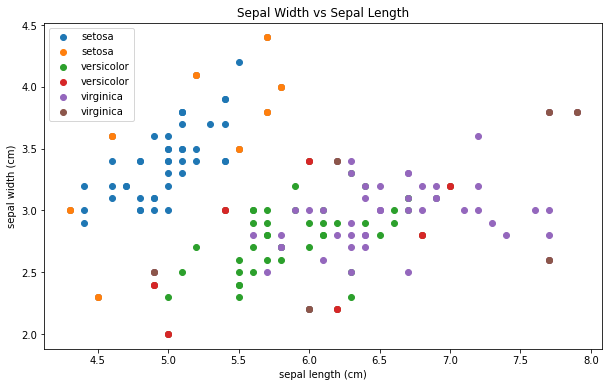

In [44]:
plt.figure(figsize = (10, 6))
colors = ['b','r','g']
plt.title('Sepal Width vs Sepal Length')
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])

for i in range(len(data.target_names)):
  bucket = df[df['Target'] == i]
  bucket = bucket.iloc[:,[0,1]].values
  plt.scatter(bucket[:, 0], bucket[:, 1], label=data.target_names[i])

  hull = myConvexHull(bucket)

  plt.scatter(hull[:, 0], hull[:, 1], label=data.target_names[i])

plt.legend()
plt.show()

## Breast Cancer

In [45]:
data = datasets.load_breast_cancer()

#create a DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names) 
df['Target'] = pd.DataFrame(data.target) 
print(df.shape)
df.head()

(569, 31)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


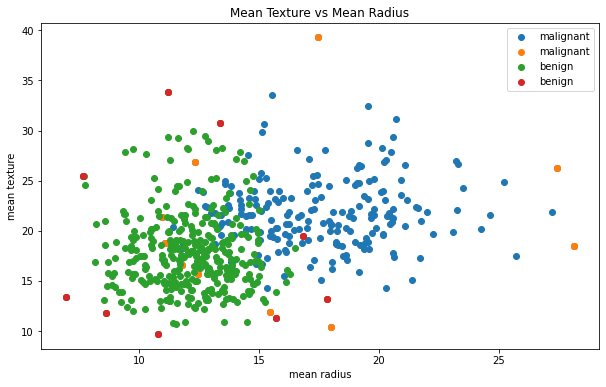

In [47]:
plt.figure(figsize = (10, 6))
colors = ['b','r','g']
plt.title('Mean Texture vs Mean Radius')
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])

for i in range(len(data.target_names)):
  bucket = df[df['Target'] == i]
  bucket = bucket.iloc[:,[0,1]].values
  plt.scatter(bucket[:, 0], bucket[:, 1], label=data.target_names[i])

  hull = myConvexHull(bucket)

  plt.scatter(hull[:, 0], hull[:, 1], label=data.target_names[i])

plt.legend()
plt.show()